<a href="https://colab.research.google.com/github/pythonuzgit/elmurodov/blob/master/Cryptocurrency/Cryptocurrency_Market_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip '/content/top-1000-cryptos-historical.zip'

Archive:  /content/top-1000-cryptos-historical.zip
  inflating: 1000_cryptos.csv        


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/content/1000_cryptos.csv')
df.head()

,dates,symbol,open,close,high,low,volume,adj_close
0,2023-11-03 00:00:00,CONX28135-USD,2.766242,2.779327,2.779855,2.748470,78754.0,2.779327
1,2023-11-04 00:00:00,CONX28135-USD,2.779420,1.899987,5.923680,1.674314,118540.0,1.899987
2,2023-11-05 00:00:00,CONX28135-USD,1.900574,2.223974,7.864717,1.894076,122869.0,2.223974
3,2023-11-06 00:00:00,CONX28135-USD,2.223231,2.802836,2.944193,2.215092,301909.0,2.802836
4,2023-11-07 00:00:00,CONX28135-USD,2.802946,2.835108,2.868475,2.633584,308725.0,2.835108


DataFrame Information Before Transformation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184995 entries, 0 to 2184994
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   dates      object 
 1   symbol     object 
 2   open       float64
 3   close      float64
 4   high       float64
 5   low        float64
 6   volume     float64
 7   adj_close  float64
dtypes: float64(6), object(2)
memory usage: 133.4+ MB


Transformation

Data Cleaning and Formatting

In [ ]:
# Set the display format for float and integer values
pd.options.display.float_format = '{:.2f}'.format

# Display the updated DataFrame
df

,dates,symbol,open,close,high,low,volume,adj_close
0,2023-11-03 00:00:00,CONX28135-USD,2.77,2.78,2.78,2.75,78754.00,2.78
1,2023-11-04 00:00:00,CONX28135-USD,2.78,1.90,5.92,1.67,118540.00,1.90
2,2023-11-05 00:00:00,CONX28135-USD,1.90,2.22,7.86,1.89,122869.00,2.22
3,2023-11-06 00:00:00,CONX28135-USD,2.22,2.80,2.94,2.22,301909.00,2.80
4,2023-11-07 00:00:00,CONX28135-USD,2.80,2.84,2.87,2.63,308725.00,2.84
...,...,...,...,...,...,...,...,...
2184990,2025-02-20 00:00:00,NOM-USD,0.01,0.01,0.01,0.01,90333.00,0.01
2184991,2025-02-21 00:00:00,NOM-USD,0.01,0.01,0.01,0.01,103571.00,0.01
2184992,2025-02-22 00:00:00,NOM-USD,0.01,0.01,0.01,0.01,71626.00,0.01
2184993,2025-02-23 00:00:00,NOM-USD,0.01,0.01,0.01,0.01,108165.00,0.01


Missing Value Imputation and Reverse Normalization

In [ ]:
# Check for missing data
df.isnull().sum()

,0
dates,0
symbol,0
open,26056
close,26056
high,26056
low,26056
volume,26056
adj_close,26056


In [ ]:
import seaborn as sns

In [ ]:
def fill_missing(df):
    ### function to impute missing values using interpolation ###
    df['open'] = df['open'].interpolate()
    df['close'] = df['close'].interpolate()
    df['high'] = df['high'].interpolate()
    df['low'] = df['low'].interpolate()
    df['volume'] = df['volume'].interpolate()
    df['adj_close'] = df['adj_close'].interpolate()
    print(f'No. of Missing values after interpolation:\n{df.isnull().sum()}')

fill_missing(df)

No. of Missing values after interpolation:
dates        0
symbol       0
open         0
close        0
high         0
low          0
volume       0
adj_close    0
dtype: int64


In [ ]:
df.columns

Index(['dates', 'symbol', 'open', 'close', 'high', 'low', 'volume',
       'adj_close'],
      dtype='object')

In [ ]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)
print(f'Memory of the dataframe:\n{mem_usage(df)}')
#print(f'No. of Missing values after interpolation:\n{df.isnull().sum()}')

Memory of the dataframe:
394.35 MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184995 entries, 0 to 2184994
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   dates      object 
 1   symbol     object 
 2   open       float64
 3   close      float64
 4   high       float64
 5   low        float64
 6   volume     float64
 7   adj_close  float64
dtypes: float64(6), object(2)
memory usage: 133.4+ MB


In [ ]:
gl_float = df.select_dtypes(include=['float'])
converted_float = gl_float.apply(pd.to_numeric,downcast='float')
compare_floats = pd.concat([gl_float.dtypes,converted_float.dtypes],axis=1)
compare_floats.columns = ['Before','After']
compare_floats.apply(pd.Series.value_counts)

,Before,After
float64,6,6


In [ ]:
print(f"Before float conversion:\n{mem_usage(df)}")
df[converted_float.columns] = converted_float
print(f"After float conversion:\n{mem_usage(df)}")

Before float conversion:
394.35 MB
After float conversion:
394.35 MB


In [ ]:
# Select numerical columns for imputation
numeric_cols = ['open', 'close', 'high', 'low', 'volume', 'adj_close']

# Normalization
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# KNN Imputation
imputer = KNNImputer(n_neighbors=3)
df_imputed = df_normalized.copy()
df_imputed[numeric_cols] = imputer.fit_transform(df_normalized[numeric_cols])

# Reverse normalization
df_imputed[numeric_cols] = scaler.inverse_transform(df_imputed[numeric_cols])

df = df_imputed.copy()
df

,dates,symbol,open,close,high,low,volume,adj_close
0,2023-11-03 00:00:00,CONX28135-USD,2.77,2.78,2.78,2.75,78754.00,2.78
1,2023-11-04 00:00:00,CONX28135-USD,2.78,1.90,5.92,1.67,118540.00,1.90
2,2023-11-05 00:00:00,CONX28135-USD,1.90,2.22,7.86,1.89,122869.00,2.22
3,2023-11-06 00:00:00,CONX28135-USD,2.22,2.80,2.94,2.22,301909.00,2.80
4,2023-11-07 00:00:00,CONX28135-USD,2.80,2.84,2.87,2.63,308725.00,2.84
...,...,...,...,...,...,...,...,...
2184990,2025-02-20 00:00:00,NOM-USD,0.01,0.01,0.01,0.01,90333.00,0.01
2184991,2025-02-21 00:00:00,NOM-USD,0.01,0.01,0.01,0.01,103571.00,0.01
2184992,2025-02-22 00:00:00,NOM-USD,0.01,0.01,0.01,0.01,71626.00,0.01
2184993,2025-02-23 00:00:00,NOM-USD,0.01,0.01,0.01,0.01,108165.00,0.01


In [ ]:
df.tail()

,dates,symbol,open,close,high,low,volume,adj_close
2184990,2025-02-20 00:00:00,NOM-USD,0.01,0.01,0.01,0.01,90333.00,0.01
2184991,2025-02-21 00:00:00,NOM-USD,0.01,0.01,0.01,0.01,103571.00,0.01
2184992,2025-02-22 00:00:00,NOM-USD,0.01,0.01,0.01,0.01,71626.00,0.01
2184993,2025-02-23 00:00:00,NOM-USD,0.01,0.01,0.01,0.01,108165.00,0.01
2184994,2025-02-24 15:38:00,NOM-USD,0.01,0.01,0.01,0.01,64909.00,0.01


DataFrame Information After Transformation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184995 entries, 0 to 2184994
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   dates      object 
 1   symbol     object 
 2   open       float64
 3   close      float64
 4   high       float64
 5   low        float64
 6   volume     float64
 7   adj_close  float64
dtypes: float64(6), object(2)
memory usage: 133.4+ MB


Loading

In [ ]:
# Save the DataFrame as a CSV file
df.to_csv('output.csv', index=False)

Data Analysis

In [ ]:
df = pd.read_csv('output.csv')

Time Series Analysis

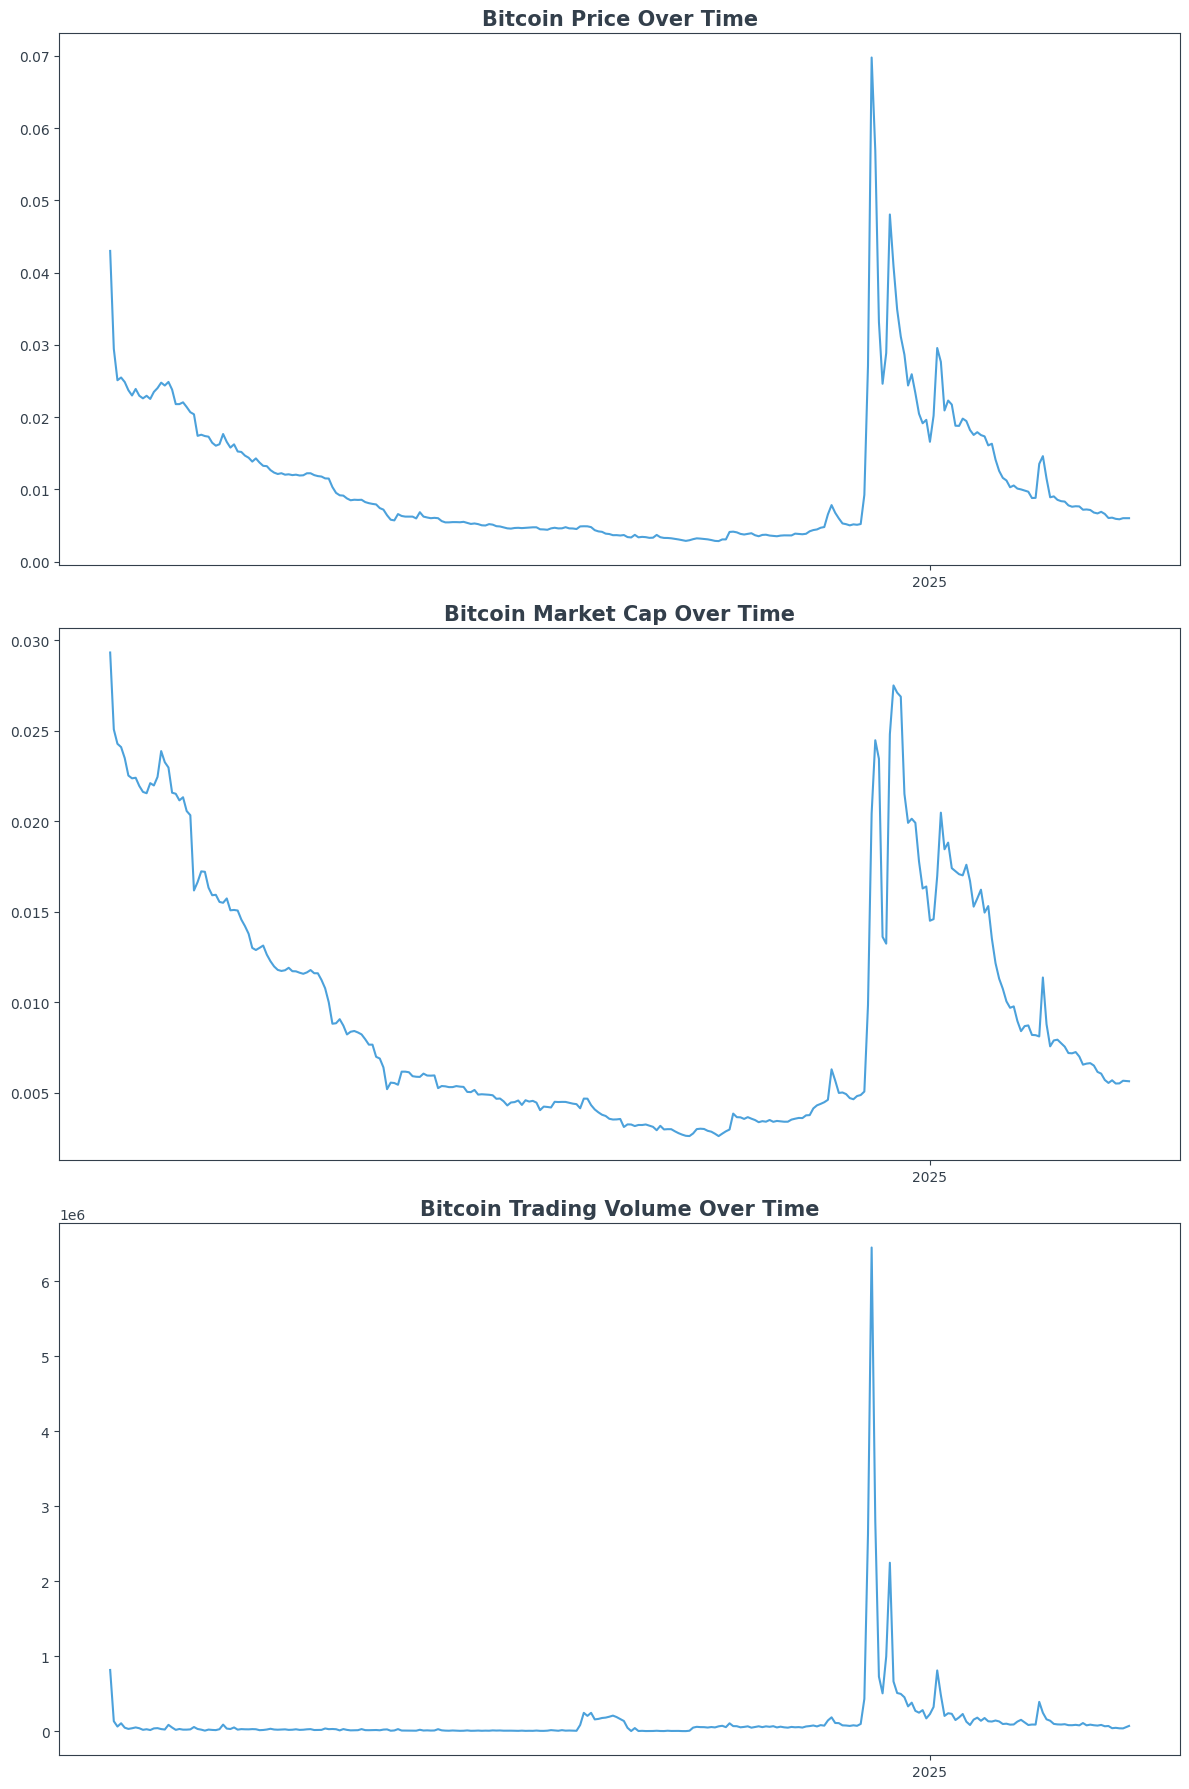

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Convert 'dates' to datetime format
df['dates'] = pd.to_datetime(df['dates'])

# Filter data for Bitcoin
btc_data = df[df['symbol'] == 'SKYA-USD']

# Set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

import matplotlib.dates as mdates

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Plot 'high' over time
axs[0].plot(btc_data['dates'], btc_data['high'], color='#007acc', alpha=0.7)
axs[0].set_title('Bitcoin Price Over Time', fontsize=15, fontweight='black', color = '#333F4B')

# Plot 'low' over time
axs[1].plot(btc_data['dates'], btc_data['low'], color='#007acc', alpha=0.7)
axs[1].set_title('Bitcoin Market Cap Over Time', fontsize=15, fontweight='black', color = '#333F4B')

# Plot 'volume' over time
axs[2].plot(btc_data['dates'], btc_data['volume'], color='#007acc', alpha=0.7)
axs[2].set_title('Bitcoin Trading Volume Over Time', fontsize=15, fontweight='black', color = '#333F4B')

# Formatting dates
date_format = mdates.DateFormatter('%Y')
for ax in axs:
    ax.xaxis.set_major_formatter(date_format)
    ax.xaxis.set_major_locator(mdates.YearLocator())

plt.tight_layout()
plt.show()


Correlation Analysis

In [ ]:
# Compute the correlation matrix
correlation_matrix = df[['open', 'close', 'high', 'low', 'volume', 'adj_close']].corr()

# Display the correlation matrix
correlation_matrix

,open,close,high,low,volume,adj_close
open,1.00,1.00,0.26,1.00,0.00,1.00
close,1.00,1.00,0.26,1.00,0.00,1.00
high,0.26,0.26,1.00,0.26,0.00,0.26
low,1.00,1.00,0.26,1.00,0.00,1.00
volume,0.00,0.00,0.00,0.00,1.00,0.00
adj_close,1.00,1.00,0.26,1.00,0.00,1.00


Trend Analysis

In [ ]:
# Convert the 'Date' column to datetime format
df['dates'] = pd.to_datetime(df['dates'])

# Sort the data by 'symbol' and 'dates'
data_sorted = df.sort_values(by=['symbol', 'dates'])

# Calculate for 'symbol', 'high', and 'low' for each cryptocurrency
growth_rates = data_sorted.groupby('symbol').apply(lambda x: ((x[['high', 'low']].iloc[-1] - x[['high', 'low']].iloc[0]) / x[['high', 'low']].iloc[0]) * 100)

# Display the growth rates
growth_rates

<ipython-input-24-f869b750951e>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  growth_rates = data_sorted.groupby('symbol').apply(lambda x: ((x[['high', 'low']].iloc[-1] - x[['high', 'low']].iloc[0]) / x[['high', 'low']].iloc[0]) * 100)


,high,low
symbol,,
0X0-USD,16065.03,34629.92
0XGAS-USD,18673.77,21772.39
10SET-USD,-86.35,-85.35
1INCH-USD,-90.82,-81.46
3ULL26863-USD,35.19,35.30
...,...,...
ZTX-USD,-72.47,-65.18
ZUKI-USD,-69.78,-65.07
ZUSD8772-USD,96.95,-1.39


Volatility Analysis

In [ ]:
# Calculate the percentage change in 'Price' for each row
data_sorted['adj change'] = data_sorted.groupby('symbol')['adj_close'].pct_change()

# Calculate the volatility as the standard deviation of the percentage change in 'Price' for each cryptocurrency
volatility = data_sorted.groupby('symbol')['adj change'].std()

volatility

,adj change
symbol,
0X0-USD,0.13
0XGAS-USD,87.83
10SET-USD,0.46
1INCH-USD,0.06
3ULL26863-USD,0.09
...,...
ZTX-USD,0.07
ZUKI-USD,36.81
ZUSD8772-USD,0.08


Comparative Analysis

In [ ]:
# Get the most recent data for each cryptocurrency
most_recent_data = data_sorted.groupby('symbol').last()

# Display the 'Price', 'Market Cap', and 'Volume (24hr)' for each cryptocurrency
comparative_data = most_recent_data[['high', 'low', 'volume']]

comparative_data

,high,low,volume
symbol,,,
0X0-USD,0.12,0.11,431086.00
0XGAS-USD,0.52,0.49,2666.00
10SET-USD,0.10,0.10,154532.00
1INCH-USD,0.27,0.25,23159140.00
3ULL26863-USD,0.00,0.00,879603.00
...,...,...,...
ZTX-USD,0.00,0.00,514631.00
ZUKI-USD,0.13,0.13,0.00
ZUSD8772-USD,1.97,0.99,36146.00


Predictive Analysis

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0070
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0072
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0062
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0043
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0034
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0063
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0075
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0035
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0113
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0112
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0033
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0027
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0055
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0080
Epoch 16/50
7/7 ━━━━━━━━━━━━━━━━━━

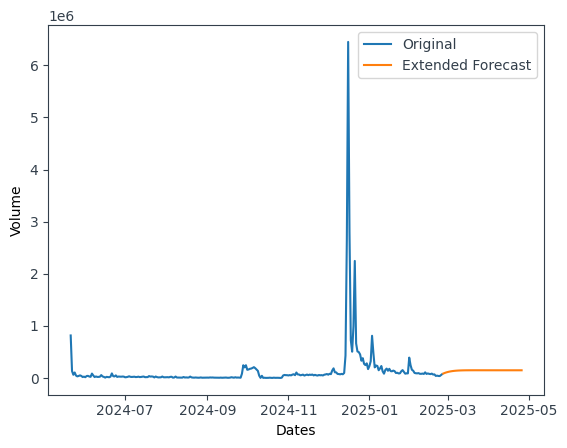

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


# Filter the data for Bitcoin
bitcoin_data = data_sorted[data_sorted['symbol'] == 'SKYA-USD']

# Extract the 'volume' column

price_data = bitcoin_data['volume'].values


# Normalize the data
scaler = MinMaxScaler()
price_data_normalized = scaler.fit_transform(price_data.reshape(-1, 1))

# Define the number of previous time steps to consider for the LSTM model
n_steps = 30

# Create input features and target variable
X = []
y = []
for i in range(n_steps, len(price_data_normalized)):
    X.append(price_data_normalized[i-n_steps:i])
    y.append(price_data_normalized[i])
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
last_sequence = X_test[-1]  # Get the last sequence from the testing set
forecast = []
for _ in range(60):  # Change the range to 60 for predicting 60 days
    next_prediction = model.predict(last_sequence.reshape(1, n_steps, 1))
    forecast.append(next_prediction[0, 0])
    last_sequence = np.append(last_sequence[1:], next_prediction[0, 0])

# Inverse normalize the predictions
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Generate the future dates for the forecast
last_date = bitcoin_data['dates'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=60)  # Change the periods to 60

# Plot the original data and the extended forecast
plt.plot(bitcoin_data['dates'], price_data, label='Original')
plt.plot(future_dates, forecast, label='Extended Forecast')
plt.xlabel('Dates')
plt.ylabel('Volume')
plt.legend()
plt.show()